In [1]:
import pandas as pd # importing pandas library
import numpy as np # importing numpy library
import matplotlib.pyplot as plt # importing pyplot module in matplotlib library 
data = pd.read_csv("C:\\Users\\vsanu\\Downloads\\archive (5)\\titles.csv") # Reading the dataset

In [2]:
data.shape # finding the shape of the dataset as first value indicates the number of rows and second value indicates number of columns in the dataset.

(5850, 15)

In [3]:
# Calculating the total number of missing values in the dataset
missing = data.isnull().sum()

# Calculating the total number of elements in the dataset
elements = data.size

# Calculating the percentage of missing values
percentage_Missing = (missing / elements) * 100

percentage_Missing

id                      0.000000
title                   0.001140
type                    0.000000
description             0.020513
release_year            0.000000
age_certification       2.984615
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
seasons                 4.266667
imdb_id                 0.459259
imdb_score              0.549288
imdb_votes              0.567521
tmdb_popularity         0.103704
tmdb_score              0.354416
dtype: float64

In [4]:
# Calculating the total number of missing values in the dataset
total_missing = data.isnull().sum().sum()

# Calculating the total number of elements in the dataset
total_elements = data.size

# Calculating the percentage of missing values
percentage_missing = (total_missing / total_elements) * 100

percentage_missing

9.307122507122507

Data Imputation

In [5]:
data['tmdb_score'] = data['tmdb_score'].fillna(np.min(data['tmdb_score'])) # Filling the missing values in the tmdb_score column using fillna
data['imdb_score'] = data['imdb_score'].fillna(np.min(data['imdb_score'])) # Filling the missing values in the imdb_score column using fillna
data['imdb_votes'] = data['imdb_votes'].fillna(np.min(data['imdb_votes'])) # Filling the missing values in the imdb_votes column using fillna
data['seasons'] = data['seasons'].fillna(1) # filled with 1 considering that atleast 1 season will be there for movie or show

In [6]:
df = data.dropna() # deleting remaining missing values

In [7]:
df.shape # finding the shape of the dataset after handeling the dataset

(3032, 15)

Question 1 : Provide the movie Type, Title, Release year and genre by entering the movie id.

In [8]:
def get_movie_details(movie_id, df):
   # movie_id is the unique identifier of the movie for which details are being requested. 
   # df is the DataFrame containing movie information.  
    
    movie_details = df[df['id'] == movie_id] # To filter the dataframe for the given movie ID

    if len(movie_details) > 0: # To check if the movie is found by checking the length of the filtered dataframe
        details = movie_details.iloc[0] # .iloc[0] is used to extracts the first row from movie_details, if the movie is found in the dataset.
        return {
            "Title": details['title'],
            "Type": details['type'],
            "Genre": details['genres'],
            "Release Year": details['release_year']
            
        }
    else:
        return "There is no movie with this movie_id"

movie_id = input("Enter the id of the movie: ") # user input for entering the movie id 
print("Details of the movie with ID " + movie_id + ": ", get_movie_details(movie_id, df))


Enter the id of the movie:  tm172504


Details of the movie with ID tm172504:  There is no movie with this movie_id


Question 2: Number of shows and movies are done on particular years.

In [9]:
movies_year = df[(df['release_year'] >= 1970) & (df['release_year'] <= 1980)] # Filtering the DataFrame for movies/shows released between the years we wanted

# Grouping the filtered data by 'type' and 'release_year' and counting the occurrences
yearly_counts = movies_year.groupby(['release_year', 'type']).size().unstack(fill_value=0) # groupby is used to grouping consecutive elements in an iterable that have the same value.
# unstack is used to reshape the given pandas dataframe by transposing specified row level to column level.
print("The yearly counts of movies and shows are:")
print(yearly_counts)


The yearly counts of movies and shows are:
type          MOVIE  SHOW
release_year             
1971              1     0
1972              2     1
1975              1     0
1976              1     0
1977              1     0
1979              2     0
1980              1     0


question 3: Is there any correlation between IMDB votes and IMDB Score?

In [10]:
# Calculating the Pearson correlation coefficient between imdb_votes and imdb_score
correlation = df[['imdb_votes', 'imdb_score']].corr(method='pearson') # correlation is used to find relation between two variables.
# pearson is the most commonly used correlation coefficient 

# Displaying the correlation coefficient
correlation_runtime_imdb_score = correlation.at['imdb_votes', 'imdb_score']
correlation_runtime_imdb_score

0.2054106664260018

This value suggests a weak positive correlation between the two variables. In other words, there is a slight tendency for movies with more IMDb votes to have higher IMDb scores, but the correlation is not strong.

Question 4: How many movies and shows are with runtime 150 or more.

In [11]:
# initiating movie and show count as 0
movie_count = 0
show_count = 0

for index, row in df.iterrows():
    if row['runtime'] >= 150: # movies/shows with run time >= 150
        if row['type'] == 'MOVIE': # selecting only movies
            movie_count += 1 # incrementing the count of the movies
        else:
            show_count += 1 # incrementing the count of the shows
print("Number of Movies with runtime 150 or more:", movie_count)
print("Number of Shows with runtime 150 or more:", show_count)

Number of Movies with runtime 150 or more: 76
Number of Shows with runtime 150 or more: 1


Question 5: what is the best movie in every decade according to the rating?

In [12]:
def top_movies_by_average_score_each_decade(df):
    df_copy = df.copy()  # Creating a copy of the DataFrame
    
    df_copy['decade'] = (df_copy['release_year'] // 10) * 10 # calculating the decade column by using the release_year
    
    
    df_copy['average_score'] = df_copy[['imdb_score', 'tmdb_score']].mean(axis=1) # calculating the average score of imdb_score and tmdb_score
    
    top_movies = df_copy.groupby('decade').apply(lambda x: x.nlargest(1, 'average_score'))  # Finding the movie with the highest average score in each decade
    # groupby is used to grouping consecutive elements in an iterable that have the same value.
    # the apply function will apply each element of the series to the lambda function and the lambda function will then return a value for each element based on the expression you passed it.
    # .largest is used to return the  first n rows ordered by columns in descending order.
    sorted_top_movies = top_movies.sort_values(by='average_score', ascending=False) # sorting the movies list in decending order
    
    return sorted_top_movies[['title', 'decade', 'imdb_score', 'tmdb_score', 'average_score']]

top_movies_by_average_score_decade = top_movies_by_average_score_each_decade(df)
top_movies_by_average_score_decade.reset_index(drop=True) # it will help to drop the current index and provies the new index starting with 0.

,title,decade,imdb_score,tmdb_score,average_score
0,Dharmakshetra,2010,8.3,10.000,9.1500
1,Breaking Bad,2000,9.5,8.790,9.1450
2,Arcane,2020,9.0,9.081,9.0405
3,One Piece,1990,8.8,8.764,8.7820
4,Seinfeld,1980,8.9,8.301,8.6005
5,Monty Python's Flying Circus,1960,8.8,8.306,8.5530
6,Taxi Driver,1970,8.2,8.179,8.1895


Question 6: Name top 10 movies and shows with more IMDB Score.

In [13]:
sorted_df = df.sort_values(by='imdb_score', ascending=False) # Sorting the DataFrame by 'imdb_score' in descending order

top_10_titles = [] # Initializing an empty list to store top 10 titles 
counter = 0 #  Initializing a counter

for index, row in sorted_df.iterrows(): # Iterating over the sorted DataFrame
    top_10_titles.append((row['title'], row['type'], row['imdb_score']))  # Adding title, type, and imdb_score to the list
    # apply() method is used to apply a function along one of the axis of the dataframe.
    counter += 1 # Incrementing the counter

    if counter == 10: # Breaking the loop once 10 titles have been added
        break

top_10_titles_df = pd.DataFrame(top_10_titles, columns=['Title', 'Type', 'IMDb Score']) # Converting the list to a DataFrame for display

top_10_titles_df


,Title,Type,IMDb Score
0,Breaking Bad,SHOW,9.5
1,Our Planet,SHOW,9.3
2,Avatar: The Last Airbender,SHOW,9.3
3,Reply 1988,SHOW,9.2
4,The Last Dance,SHOW,9.1
5,Kota Factory,SHOW,9.1
6,My Mister,SHOW,9.1
7,Chhota Bheem & Krishna vs Zimbara,MOVIE,9.1
8,Attack on Titan,SHOW,9.0
9,Leah Remini: Scientology and the Aftermath,SHOW,9.0


Question 7: Name top 3 production countries in the netflix  

In [14]:
production_country_counts = df['production_countries'].value_counts().head(3) # counting the top 3 different countries in the production_countries
country_percentages = (production_country_counts/ production_country_counts.sum()) * 100  # converting the counts into percentage
country_percentages = country_percentages.apply(lambda x: f"{x:.2f}%") # applying the percentage symbol to the percentage after two decimals
country_percentages

production_countries
['US']    76.09%
['IN']    12.72%
['JP']    11.19%
Name: count, dtype: object

Question 8 : What is the minimum and maximum imdb score and tmdb score that a show/movie got in the score.

In [15]:
min_imdbScore = np.min(df['imdb_score']) # finding min imdb_score
max_imdbScore = np.max(df['imdb_score']) # finding max imdb_score
min_tmdbScore = np.min(df['tmdb_score']) # finding min tmdb_score
max_tmdbScore = np.max(df['tmdb_score']) # finding max tmdb_score
print("Minimum IMDB score of a movie/show in netflix history is:" , min_imdbScore)
print("Maximum IMDB score of a movie/show in netflix history is:" , max_imdbScore)
print("Minimum TMDB score of a movie/show in netflix history is:" , min_tmdbScore)
print("Maximum TMDB score of a movie/show in netflix history is:" , max_tmdbScore)

Minimum IMDB score of a movie/show in netflix history is: 1.5
Maximum IMDB score of a movie/show in netflix history is: 9.5
Minimum TMDB score of a movie/show in netflix history is: 0.5
Maximum TMDB score of a movie/show in netflix history is: 10.0


question 9: Compare IMDb and TMDb Scores of Top 10 Longest Runtime Movies in the netflix.

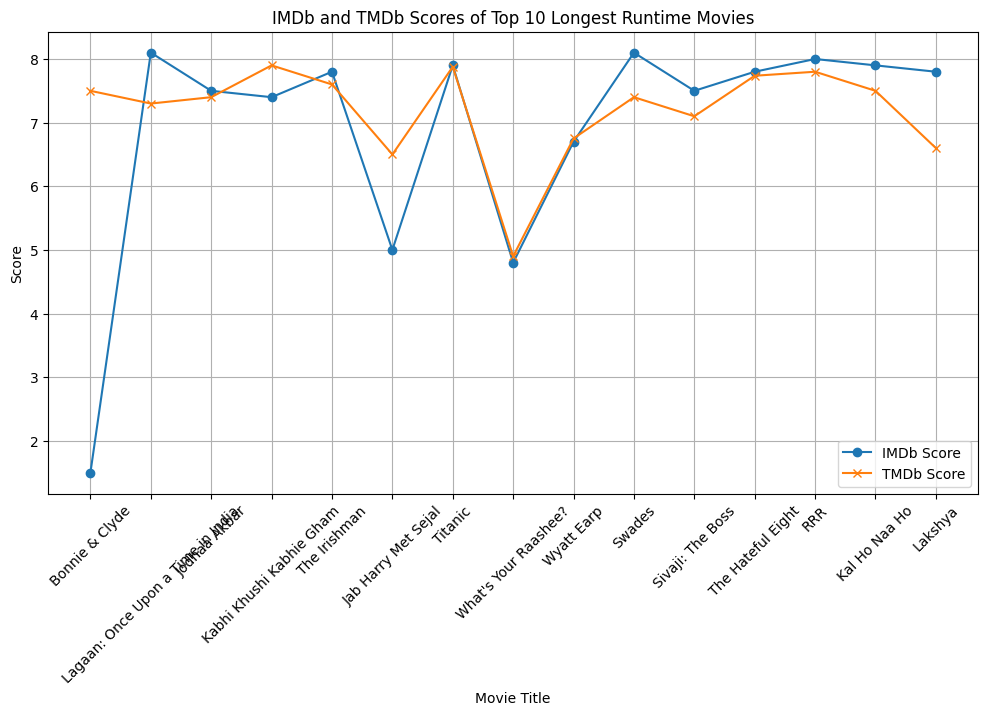

In [16]:
top_10_movies_runtime = df[df['type'] == 'MOVIE'].nlargest(15, 'runtime') # Selecting the top 10 movies with the highest runtime

# Plotting line charts for IMDb and TMDb scores of these movies
plt.figure(figsize=(12, 6))

# IMDb Score line chart
plt.plot(top_10_movies_runtime['title'], top_10_movies_runtime['imdb_score'], label='IMDb Score', marker='o')

# TMDb Score line chart
plt.plot(top_10_movies_runtime['title'], top_10_movies_runtime['tmdb_score'], label='TMDb Score', marker='x')

plt.title('IMDb and TMDb Scores of Top 10 Longest Runtime Movies')
plt.xlabel('Movie Title')
plt.ylabel('Score')
plt.xticks(rotation= 45)
plt.legend()
plt.grid(True)
plt.show()


Question 10: Provide the list of the movies with R age cretification and runtime of two or more hours in a particular year. 

In [ ]:
target_year = int(input("Enter the year:")) # user input for the entering the target year

for index, row in df.iterrows():
    if row['release_year'] == target_year: # finding the rows in the release_year which contains the target_year
        if row['age_certification'] == 'R': # finding the rows in the age_certification which contains R
            if row['runtime'] >= 120: #finding the rows of runtime >= 120
                print(f"Title released in {target_year} with 'R' rating: {row['title']}")
                break
else:
    print("no")

In [ ]:
sorted_df = df.sort_values(by='runtime', ascending=False) 
sorted_df.head(20)

In [ ]:
max_tmdbScore = np.max(df['tmdb_score'])
print(f"Title released in {max_tmdbScore} with 'R' rating: {row['title']}")

In [ ]:
production_country_counts = df['genres'].value_counts().head(10) # counting the top 3 different countries in the production_countries
country_percentages = (production_country_counts/ production_country_counts.sum()) * 100  # converting the counts into percentage
country_percentages = country_percentages.apply(lambda x: f"{x:.2f}%") # applying the percentage symbol to the percentage after two decimals
country_percentages